<a href="https://colab.research.google.com/github/HrushhikeshMate/trial-and-error/blob/main/eda_of_trial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd

# Load the dataset
nba_data = pd.read_csv('/content/2019-2024_nba.csv')



In [10]:
nba_data.head()

,Season,Rk,Team,Name,G,Date,At,Opp,W/L,Location,...,eFG%,TOV%,ORB%,FT/FGA,Unnamed: 23,eFG%.1,TOV%.1,DRB%,FT/FGA.1,Win
0,2019,1,ATL,Atlanta Hawks,1,2018-10-17,@,NYK,L,Away,...,0.511,19.7,16.3,0.167,NaN,0.515,12.4,79.2,0.242,0
1,2019,2,ATL,Atlanta Hawks,2,2018-10-19,@,MEM,L,Away,...,0.578,16.1,24.4,0.253,NaN,0.623,14.5,80.6,0.370,0
2,2019,3,ATL,Atlanta Hawks,3,2018-10-21,@,CLE,W,Away,...,0.602,10.1,20.9,0.153,NaN,0.515,14.6,70.0,0.091,1
3,2019,4,ATL,Atlanta Hawks,4,2018-10-24,NaN,DAL,W,Home,...,0.489,12.5,18.9,0.242,NaN,0.484,14.2,83.0,0.176,1
4,2019,5,ATL,Atlanta Hawks,5,2018-10-27,NaN,CHI,L,Home,...,0.393,18.9,20.0,0.226,NaN,0.506,20.3,82.2,0.157,0


In [12]:
nba_data= nba_data.drop(columns=['Unnamed: 18','Unnamed: 23','At'])

In [13]:
nba_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14118 entries, 0 to 14117
Data columns (total 31 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Season    14118 non-null  int64  
 1   Rk        14118 non-null  int64  
 2   Team      14118 non-null  object 
 3   Name      14118 non-null  object 
 4   G         14118 non-null  int64  
 5   Date      14118 non-null  object 
 6   Opp       14118 non-null  object 
 7   W/L       14118 non-null  object 
 8   Location  14118 non-null  object 
 9   OPts      14118 non-null  int64  
 10  Opp_Name  14118 non-null  object 
 11  DPts      14118 non-null  int64  
 12  ORtg      14118 non-null  float64
 13  DRtg      14118 non-null  float64
 14  Pace      14118 non-null  float64
 15  FTr       14118 non-null  float64
 16  3PAr      14118 non-null  float64
 17  TS%       14118 non-null  float64
 18  TRB%      14118 non-null  float64
 19  AST%      14118 non-null  float64
 20  STL%      14118 non-null  fl

In [14]:
nba_data = nba_data.drop_duplicates()


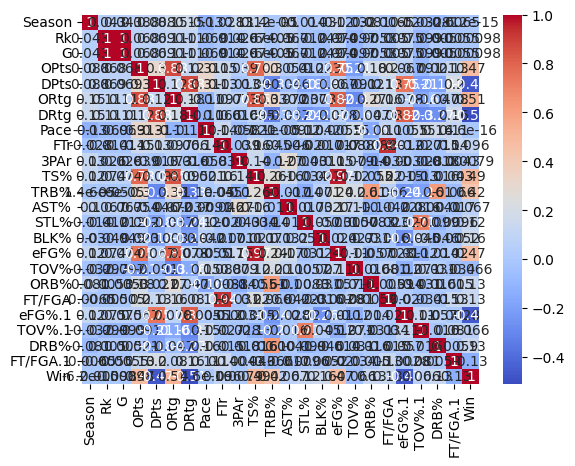

In [19]:
# correlatoin

import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns for correlation analysis
numeric_data = nba_data.select_dtypes(include=['number'])

corr_matrix = numeric_data.corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.show()


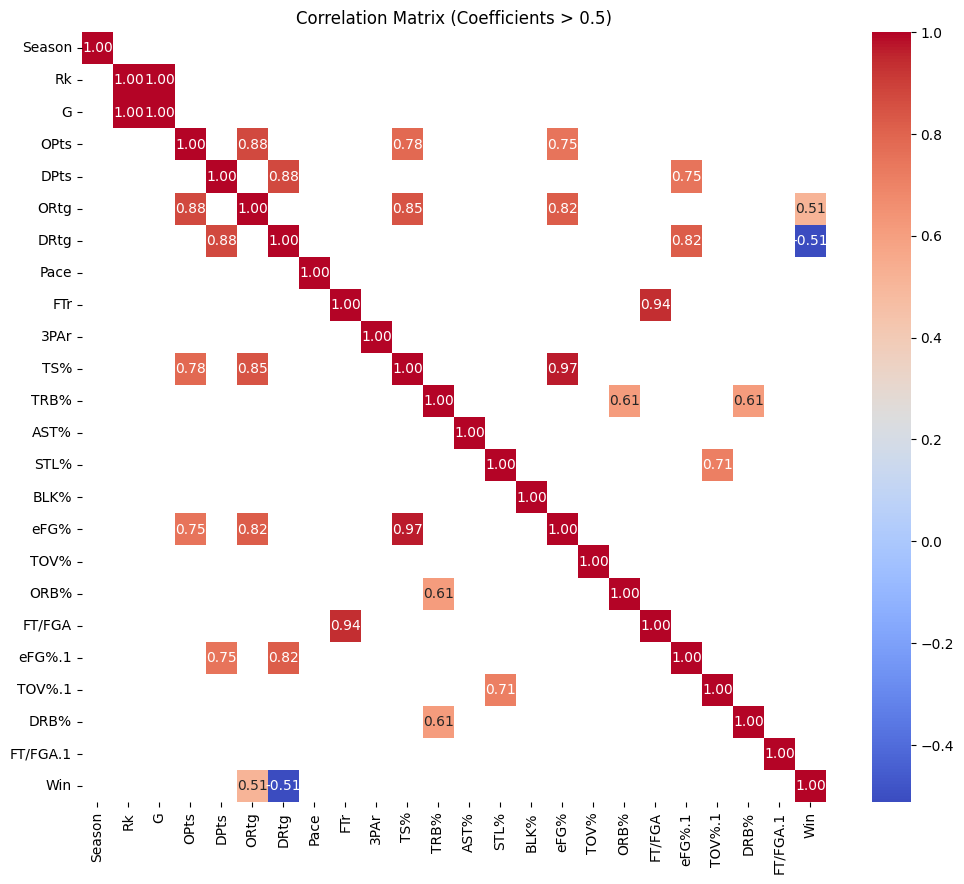

In [20]:

corr_matrix = numeric_data.corr()

# Filter the correlation matrix for values above 0.5
high_corr = corr_matrix[abs(corr_matrix) > 0.5]

# Plot the filtered correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(high_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix (Coefficients > 0.5)')
plt.show()

In [24]:
nba_data['W/L'] = nba_data['W/L'].map({'W': 1, 'L': 0})

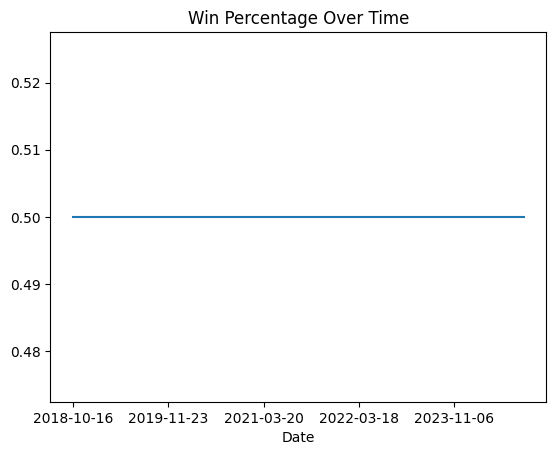

In [25]:
nba_data.groupby('Date')['W/L'].mean().plot()
plt.title('Win Percentage Over Time')
plt.show()